# Base de données d'animaux

## Générer le dataframe

Utilise panda pour générer une dataframe à partir du fichier en utilisant les tab comme séparateurs

In [1]:
import pandas as pd
df = pd.read_csv('PanTHERIA_1-0_WR05_Aug2008.txt',delimiter = "\t")
display(df)

,MSW05_Order,MSW05_Family,MSW05_Genus,MSW05_Species,MSW05_Binomial,1-1_ActivityCycle,5-1_AdultBodyMass_g,8-1_AdultForearmLen_mm,13-1_AdultHeadBodyLen_mm,2-1_AgeatEyeOpening_d,...,26-6_GR_MinLong_dd,26-7_GR_MidRangeLong_dd,27-1_HuPopDen_Min_n/km2,27-2_HuPopDen_Mean_n/km2,27-3_HuPopDen_5p_n/km2,27-4_HuPopDen_Change,28-1_Precip_Mean_mm,28-2_Temp_Mean_01degC,30-1_AET_Mean_mm,30-2_PET_Mean_mm
0,Artiodactyla,Camelidae,Camelus,dromedarius,Camelus dromedarius,3.0,492714.47,-999.0,-999.00,-999.00,...,-999.00,-999.00,-999,-999.00,-999.0,-999.00,-999.00,-999.00,-999.00,-999.00
1,Carnivora,Canidae,Canis,adustus,Canis adustus,1.0,10392.49,-999.0,745.32,-999.00,...,-17.53,13.00,0,35.20,1.0,0.14,90.75,236.51,922.90,1534.40
2,Carnivora,Canidae,Canis,aureus,Canis aureus,2.0,9658.70,-999.0,827.53,7.50,...,-17.05,45.74,0,79.29,0.0,0.10,44.61,217.23,438.02,1358.98
3,Carnivora,Canidae,Canis,latrans,Canis latrans,2.0,11989.10,-999.0,872.39,11.94,...,-168.12,-117.60,0,27.27,0.0,0.06,53.03,58.18,503.02,728.37
4,Carnivora,Canidae,Canis,lupus,Canis lupus,2.0,31756.51,-999.0,1055.00,14.01,...,-171.84,3.90,0,37.87,0.0,0.04,34.79,4.82,313.33,561.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,Rodentia,Muridae,Zyzomys,argurus,Zyzomys argurus,-999.0,40.42,-999.0,107.83,-999.00,...,114.33,131.09,0,1.10,0.0,0.02,62.33,256.75,692.93,1704.98
5412,Rodentia,Muridae,Zyzomys,maini,Zyzomys maini,-999.0,93.99,-999.0,-999.00,-999.00,...,131.45,132.66,0,0.17,0.0,0.00,90.76,265.30,877.90,1755.73
5413,Rodentia,Muridae,Zyzomys,palatilis,Zyzomys palatilis,-999.0,123.00,-999.0,-999.00,-999.00,...,136.72,137.08,0,0.00,0.0,-999.00,49.00,247.16,637.90,1638.67
5414,Rodentia,Muridae,Zyzomys,pedunculatus,Zyzomys pedunculatus,-999.0,100.00,-999.0,126.79,-999.00,...,130.16,132.97,0,0.09,0.0,0.25,21.64,215.72,291.82,1405.85


## Masse corporelle distribution des valeurs

Nous pouvons observer que certaines valeurs sont impossibles (comme -999.0), ces valeurs posent problèmes pour le calcul de la moyenne, de la médian et pour la suite du travail.

Il convient donc de les "nettoyer" avant de continuer, dans un premier temps essayons d'ignorer toutes les valeurs négatives car elles n'ont pas de sens dans ce contexte.

In [2]:
adultBodyMass = df[["5-1_AdultBodyMass_g"]]
print(adultBodyMass.min())
print(adultBodyMass.max())
print(adultBodyMass.mean())
print(adultBodyMass.median())

5-1_AdultBodyMass_g   -999.0
dtype: float64
5-1_AdultBodyMass_g    154321304.5
dtype: float64
5-1_AdultBodyMass_g    115940.09212
dtype: float64
5-1_AdultBodyMass_g    23.125
dtype: float64


In [3]:
adultBodyMass = df[["5-1_AdultBodyMass_g"]]
adultBodyMassWnV= adultBodyMass[(adultBodyMass["5-1_AdultBodyMass_g"]>0)]
print(adultBodyMassWnV.min())
print(adultBodyMassWnV.max())
print(adultBodyMassWnV.mean())
print(adultBodyMassWnV.median())

5-1_AdultBodyMass_g    1.96
dtype: float64
5-1_AdultBodyMass_g    154321304.5
dtype: float64
5-1_AdultBodyMass_g    177810.182078
dtype: float64
5-1_AdultBodyMass_g    104.465
dtype: float64


### Histogramme des masses corporelles

Maintenant que nos données ont l'air cohérente générons un histogramme

On peut voir que la différence parfois énorme de poids entre certains animaux rend l'histogramme difficile à lire et peu utile.

array([[<AxesSubplot:title={'center':'5-1_AdultBodyMass_g'}>]],
      dtype=object)

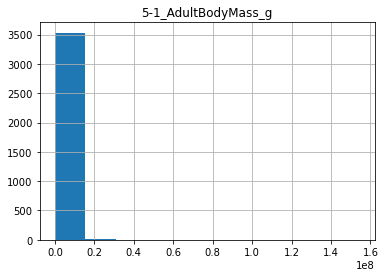

In [4]:
adultBodyMassWnV.hist()

### Histogramme des masses corporelles pour les animaux <= 50 kg

Cette fois en ayant une catégorie de poids plus restreinte l'histogramme devient lisible et il est plus facile de travailler ainsi.

array([[<AxesSubplot:title={'center':'5-1_AdultBodyMass_g'}>]],
      dtype=object)

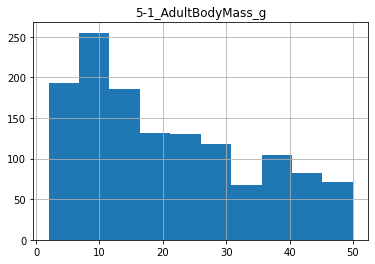

In [5]:
adultBodyMassWnVbis= adultBodyMassWnV[(adultBodyMassWnV["5-1_AdultBodyMass_g"]<=50)]
adultBodyMassWnVbis.hist()

# Loi de Benford

Pour trouver le chiffre le plus significatif de la masse des animaux nous allons reprendre les données "nettoyer" auparavant.

Ensuite nous allons faire une première fonction pour trouver le chiffre le plus significatif de notre dataset.

In [13]:
def fDigit(number) :
    while number[0] >= 10:
        number[0] = number[0] / 10;
    return int(number[0])

def signifDigitDataSet(dataset):
    dataset=dataset.to_numpy()
    un=deux=trois=quatre=cinq=six=sept=huit=neuf=0  
    for x,val in enumerate(dataset):
        if fDigit(dataset[x])==1:
            un=un+1
        elif fDigit(dataset[x])==2:
            deux=1+deux
        elif fDigit(dataset[x])==3:
            trois=1+trois
        elif fDigit(dataset[x])==4:
            quatre=1+quatre
        elif fDigit(dataset[x])==5:
            cinq=1+cinq
        elif fDigit(dataset[x])==6:
            six=1+six
        elif fDigit(dataset[x])==7:
            sept=1+sept
        elif fDigit(dataset[x])==8:
            huit=1+huit
        elif fDigit(dataset[x])==9:
            neuf=1+neuf
    if un >= max(deux,trois,quatre,cinq,six,sept,huit,neuf):
        return 1
    elif deux > max(un,trois,quatre,cinq,six,sept,huit,neuf):
        return 2
    elif trois > max(un,deux,quatre,cinq,six,sept,huit,neuf):
        return 3
    elif quatre > max(un,deux,trois,cinq,six,sept,huit,neuf):
        return 4
    elif cinq > max(un,deux,trois,quatre,six,sept,huit,neuf):
        return 5
    elif six > max(un,deux,trois,quatre,cinq,sept,huit,neuf):
        return 6
    elif sept > max(un,deux,trois,quatre,cinq,six,huit,neuf):
        return 7
    elif huit > max(un,deux,trois,quatre,cinq,six,sept,neuf):
        return 8
    elif neuf > max(un,deux,trois,quatre,cinq,six,sept,huit):
        return 9
    else:
        return -1


In [14]:
print("Chiffre le plus significatif : ",signifDigitDataSet(adultBodyMassWnV))



Chiffre le plus significatif :  1


## Fréquence d'apparition

Etant donnée qu'un compteur est déjà présent dans la première fonction il suffit de la modifier un peu pour calculez la fréquence d'apparition de chaque digit pour l'ensemble des animaux.

In [17]:
import numpy as np
def frequencySignifDigitDataSet(dataset):
    dataset=dataset.to_numpy()
    un=deux=trois=quatre=cinq=six=sept=huit=neuf=0  
    for x,val in enumerate(dataset):
        if fDigit(dataset[x])==1:
            un=un+1
        elif fDigit(dataset[x])==2:
            deux=1+deux
        elif fDigit(dataset[x])==3:
            trois=1+trois
        elif fDigit(dataset[x])==4:
            quatre=1+quatre
        elif fDigit(dataset[x])==5:
            cinq=1+cinq
        elif fDigit(dataset[x])==6:
            six=1+six
        elif fDigit(dataset[x])==7:
            sept=1+sept
        elif fDigit(dataset[x])==8:
            huit=1+huit
        elif fDigit(dataset[x])==9:
            neuf=1+neuf
    total= len(dataset)
    listCount =[]
    listCount.extend([un,deux,trois,quatre,cinq,six,sept,huit,neuf])
    frequence =np.array(([un*100/total,deux*100/total,trois*100/total,quatre*100/total,cinq*100/total,six*100/total,sept*100/total,huit*100/total,neuf*100/total]))
    return frequence

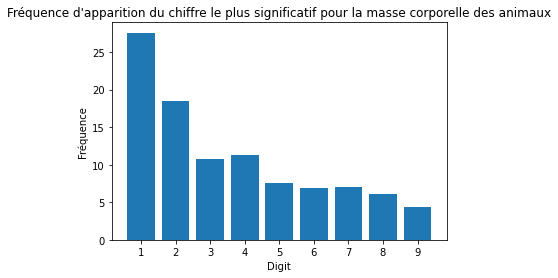

In [18]:
frequenceBodyMass=frequencySignifDigitDataSet(adultBodyMassWnV)

import matplotlib.pyplot as plt
%matplotlib inline

x = ['1', '2', '3', '4', '5', '6','7','8','9']

plt.bar(x, frequenceBodyMass)
plt.xlabel("Digit")
plt.ylabel("Fréquence")
plt.title("Fréquence d'apparition du chiffre le plus significatif pour la masse corporelle des animaux")
plt.show()

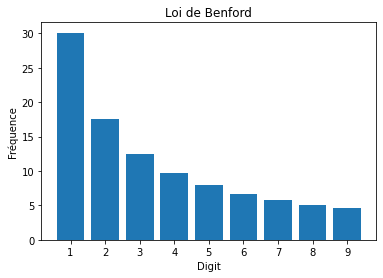

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

x = ['1', '2', '3', '4', '5', '6','7','8','9']
y = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]
plt.bar(x, y)
plt.xlabel("Digit")
plt.ylabel("Fréquence")
plt.title("Loi de Benford")
plt.show()

## Compraison

Nous pouvons voir que effectivement la fréquence de distribution suit la loi de Benford, avec peut-être comme exeption le chiffre 4.

## Essaie avec la variable taille de la tête


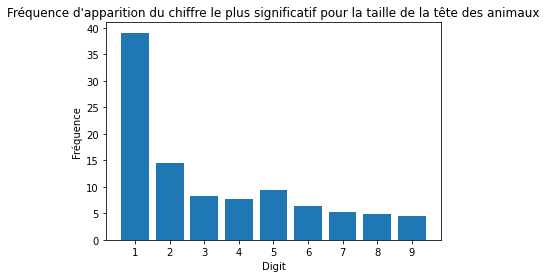

In [22]:
headLen = df[["13-1_AdultHeadBodyLen_mm"]]
headLenWnV= headLen[(headLen["13-1_AdultHeadBodyLen_mm"]>0)]

frenquencyHeadLen=frequencySignifDigitDataSet(headLenWnV)

import matplotlib.pyplot as plt
%matplotlib inline

x = ['1', '2', '3', '4', '5', '6','7','8','9']

plt.bar(x, frenquencyHeadLen)
plt.xlabel("Digit")
plt.ylabel("Fréquence")
plt.title("Fréquence d'apparition du chiffre le plus significatif pour la taille de la tête des animaux")
plt.show()